In [1]:
from module import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(context='paper', palette='deep')
sns.set_style('ticks')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 2492 non-null   object
 1   Year                                    2492 non-null   int64 
 2   Number of reported cases of cholera     2470 non-null   object
 3   Number of reported deaths from cholera  2375 non-null   object
 4   Cholera case fatality rate              2365 non-null   object
 5   WHO Region                              2492 non-null   object
dtypes: int64(1), object(5)
memory usage: 116.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 2492 non-

## Exploratory data analysis - South-East Asia

#### 1. Sum of cases, deaths, and fatality rate of cholera in countries from South-East Asia

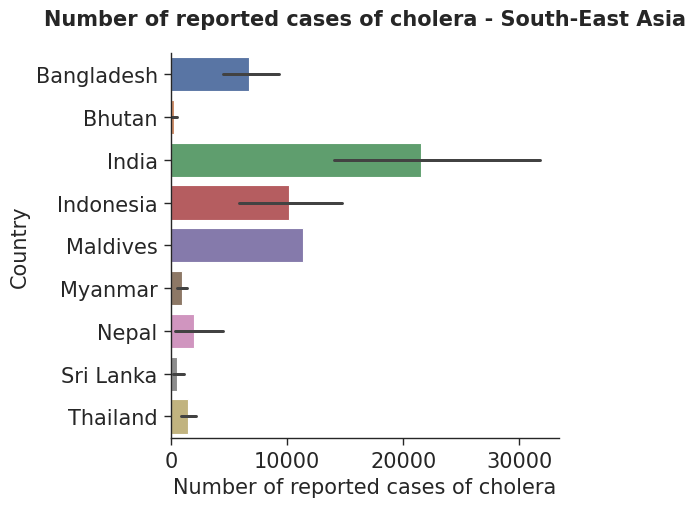

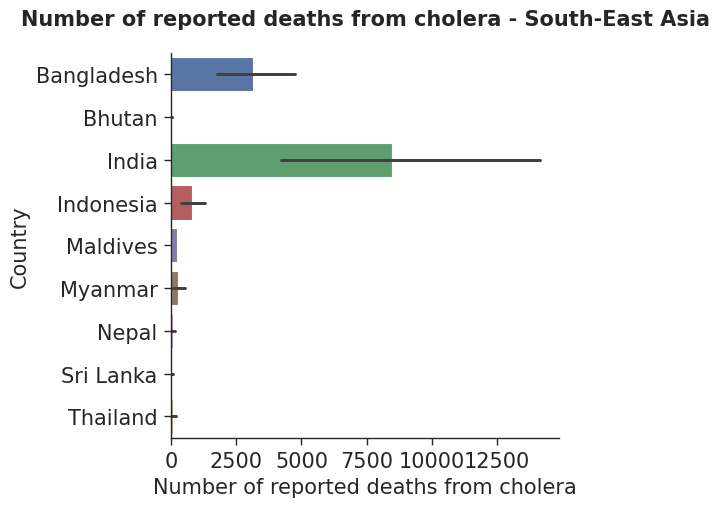

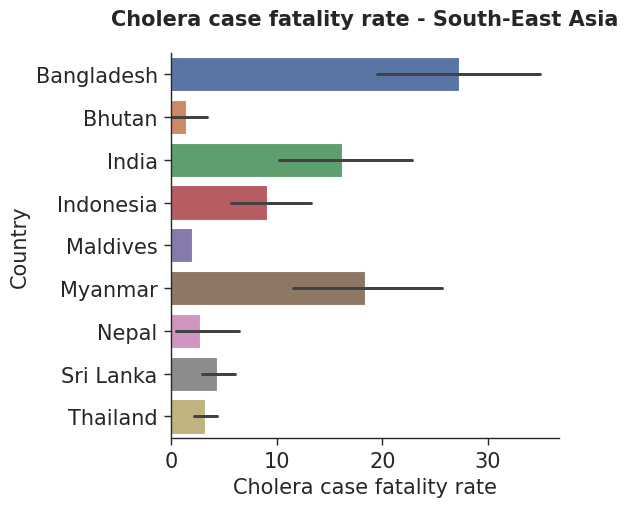

In [7]:
data_southasia = data.loc[data['WHO Region']=='South-East Asia']

for c in data_southasia.select_dtypes(include=np.number):
  if c == 'Year':
    continue
  else:    
    fig = plt.figure(figsize=(5,5))

    barplot = sns.barplot(
            data=data_southasia,
            x=c,
            y='Country',
            dodge=False
        )
    
    barplot.tick_params(
            labelsize=15, 
            pad=5)
    
    sns.despine()

    plt.title(
            f'{c} - South-East Asia',
            fontsize=15,
            fontweight='bold',
            pad = 20)

    plt.ylabel(
            'Country',
            fontsize=15
        )

    plt.xlabel(
            c,
            fontsize=15
        )

    plt.show()
    print('\n')

#### 2. Distribution of cases, deaths, and fatality rate over the years

In [3]:
for i in data_southasia.select_dtypes(include=np.number):
    
    if i != 'Year':
        fig = px.scatter(
            data_frame = data_southasia,
            x='Year',
            y=i,
            color='Country',
            width=800,
            title=i
        )

        fig.show()

#### 2. Number of cases and deaths per country per year

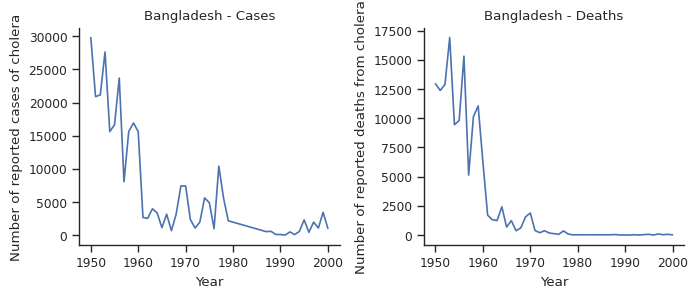

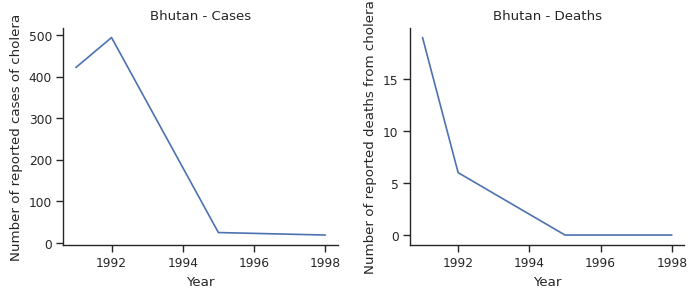

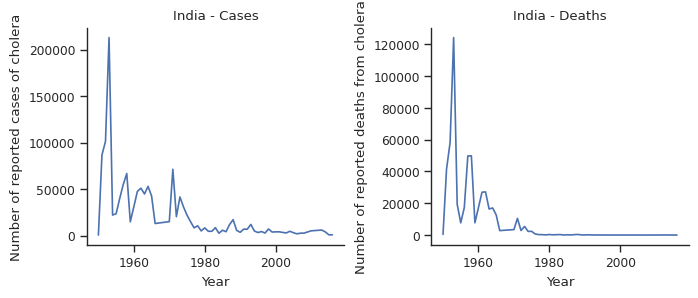

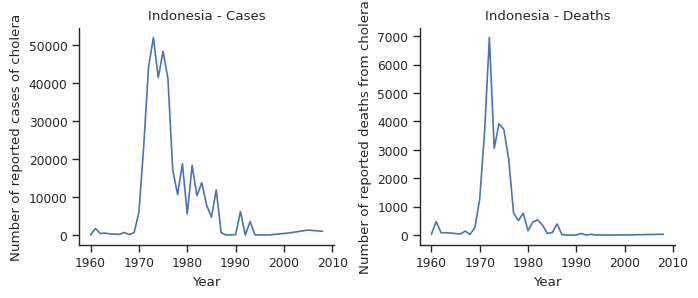

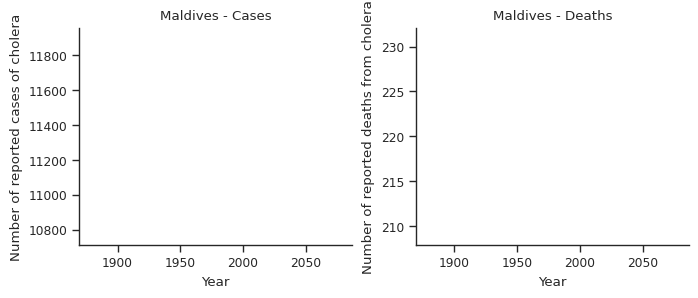

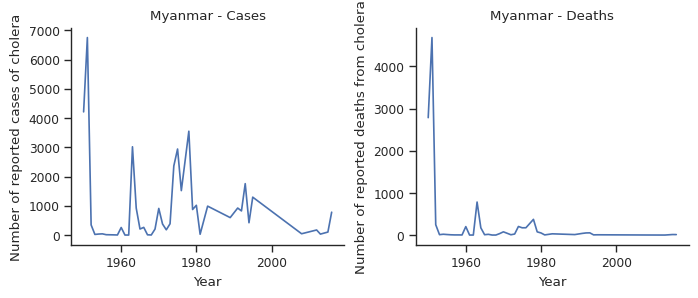

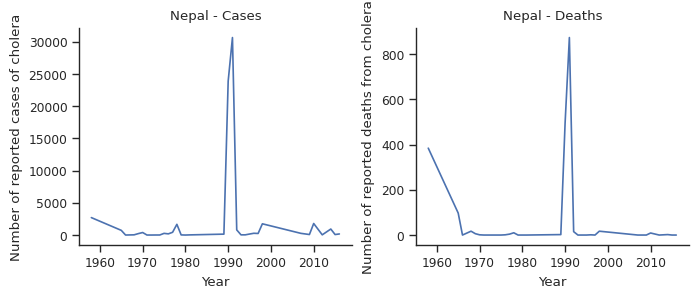

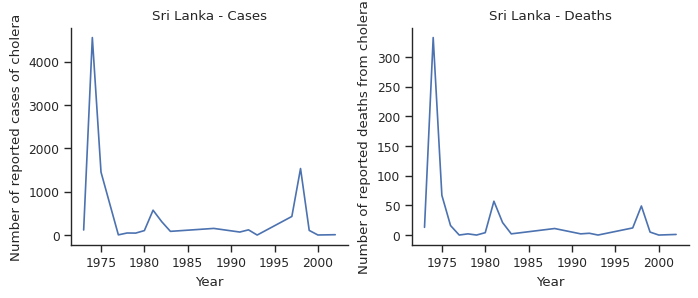

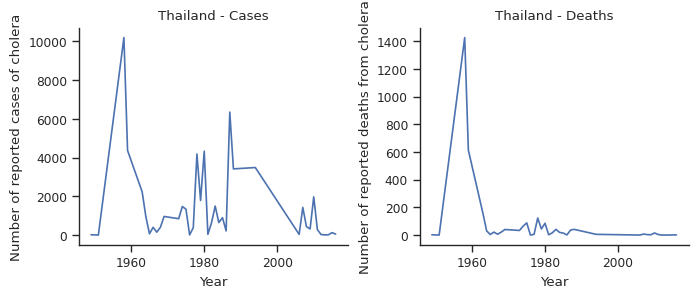

In [4]:
for i in data_southasia['Country'].unique():

    fig, axes = plt.subplots(1, 2, figsize=(7,3))

    sns.lineplot(
        data=data_southasia.loc[data['Country']==i],
        x='Year',
        y='Number of reported cases of cholera',
        ax=axes[0])

    axes[0].set(
        title=f'{i} - Cases'
    )

    sns.lineplot(
        data=data_southasia.loc[data['Country']==i],
        x='Year',
        y='Number of reported deaths from cholera',
        ax=axes[1])
    
    axes[1].set(
        title=f'{i} - Deaths'
    )
    fig.tight_layout(pad=0.8)
    sns.despine()
    plt.show()

#### 3. Cases vs Deaths per country

In [5]:
for i in data_southasia['Country'].unique():

    fig = px.bar(
    data_frame = data_southasia.loc[data['Country']==i], 
    x='Year', 
    y='Number of reported cases of cholera', 
    width=1000, 
    color='Number of reported deaths from cholera',
    color_discrete_sequence ='viridis',
    title=f'{i} - Cases vs Deaths')

    fig.show()

#### 3. Correlation heatmap

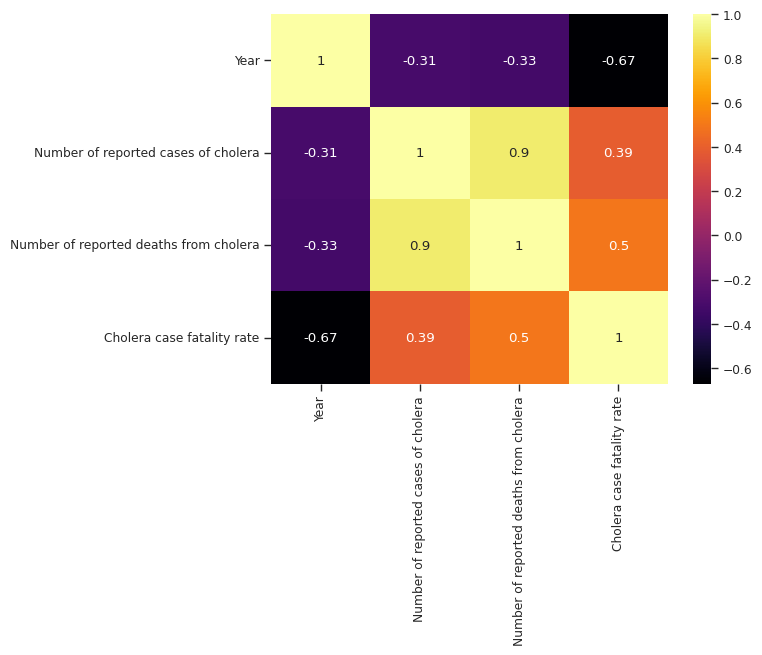

In [6]:
sns.heatmap(
    data=data_southasia.corr(numeric_only=True),
    cmap='inferno',
    annot=True)

plt.show()

## Conclusions:

- Like in the Americas, the overall number of cases, deaths, and consequently, the fatality rate, clearly decreased after the 90's. This may have happened due to the oral vaccine that came out around this time.
- Similar to other WHO regions, there are countries lacking information on cholera, like Maldives and Bhutan.
- Not only the number of cholera cases and the number of deaths are correlated, but also the number of deaths and the fatality rate appear to have some level of correlation. Further statistical analysis are needed to confirm the significance of these data.
